In [2]:
# importação dos dados
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


df = pd.read_csv('creditcard.csv')

array = df.to_numpy()

In [3]:
del df
array

array([[ 0.00000000e+00, -1.35980713e+00, -7.27811733e-02, ...,
        -2.10530535e-02,  1.49620000e+02,  0.00000000e+00],
       [ 0.00000000e+00,  1.19185711e+00,  2.66150712e-01, ...,
         1.47241692e-02,  2.69000000e+00,  0.00000000e+00],
       [ 1.00000000e+00, -1.35835406e+00, -1.34016307e+00, ...,
        -5.97518406e-02,  3.78660000e+02,  0.00000000e+00],
       ...,
       [ 1.72788000e+05,  1.91956501e+00, -3.01253846e-01, ...,
        -2.65608286e-02,  6.78800000e+01,  0.00000000e+00],
       [ 1.72788000e+05, -2.40440050e-01,  5.30482513e-01, ...,
         1.04532821e-01,  1.00000000e+01,  0.00000000e+00],
       [ 1.72792000e+05, -5.33412522e-01, -1.89733337e-01, ...,
         1.36489143e-02,  2.17000000e+02,  0.00000000e+00]])

In [4]:
X = array[:,1:30]
y = array[:,30]


In [5]:
# Verifica o balanceamento dos dados do array de entrada
# Retorna o array de entrada balanceado

def balanceamento_dados(X, y):
    # Verifica o balanceamento dos dados
    print('Dados antes do balanceamento')
    print('y = 0: ', sum(y == 0))
    print('y = 1: ', sum(y == 1))

    # Balanceamento dos dados
    from imblearn.over_sampling import SMOTE
    sm = SMOTE(random_state=100)
    X_res, y_res = sm.fit_resample(X, y)

    # Verifica o balanceamento dos dados
    print('Balanceamento dos dados após o SMOTE')
    print('y = 0: ', sum(y_res == 0))
    print('y = 1: ', sum(y_res == 1))

    return X_res, y_res

In [6]:
# Verifica se o dataset está balanceado
X_bal, y_bal = balanceamento_dados(X, y)

Dados antes do balanceamento
y = 0:  284315
y = 1:  492
Balanceamento dos dados após o SMOTE
y = 0:  284315
y = 1:  284315


In [7]:
# Cria função para separar os dados de treino e teste com os dados X e y

def train_test_split(X, y, test_size = 0.2):
    X_train = X[:-int(len(X)*test_size)]
    X_test = X[-int(len(X)*test_size):]
    y_train = y[:-int(len(y)*test_size)]
    y_test = y[-int(len(y)*test_size):]
    return X_train, X_test, y_train, y_test

In [25]:
# Separa entre dados de treino e teste

X_train, X_test, y_train, y_test = train_test_split(X_bal, y_bal, test_size=0.2)

In [26]:
# Cria perceptron com uma camada oculta e treina com os dados de treino
def unit_step(x):
    return np.where(x > 0, 1, 0)

class Perceptron:
    def __init__(self, learning_rate=0.01, n_iters=1000):
        self.lr = learning_rate
        self.n_iters = n_iters
        self.activation_func = unit_step
        self.weights = None
        self.bias = None
        self.errors = None

    def fit(self, X, y):
        # inicializa os pesos
        n_samples, n_features = X.shape
        self.weights = np.zeros(n_features)
        self.bias = 0
        self.errors = []


        # transforma os dados de treino em um array
        y_ = np.where(y > 0, 1, 0)
        
        # treina o perceptron
        for _ in range(self.n_iters):
            errors = 0
            for idx, x_i in enumerate(X):
                # faz a predição
                linear_output = np.dot(x_i, self.weights) + self.bias
                y_predicted = self.activation_func(linear_output)

                # atualiza os pesos
                update = self.lr * (y_[idx] - y_predicted)
                self.weights += update * x_i
                self.bias += update
                errors += int(update != 0.0)
            self.errors.append(errors)


    
    def predict(self, X):
        # faz a predição
        linear_output = np.dot(X, self.weights) + self.bias
        y_predicted = self.activation_func(linear_output)
        return y_predicted


In [27]:
# Cria função para medir a acurácia do modelo
def accuracy(y_true, y_pred):
    # Calcula a acurácia do modelo
    return np.sum(y_true == y_pred) / len(y_true)

In [28]:
p = Perceptron(learning_rate=0.1, n_iters=10)
p.fit(X_train, y_train)
y_pred = p.predict(X_test)
print('Accuracy: %.4f' % accuracy(y_test, y_pred))



Accuracy: 1.0000


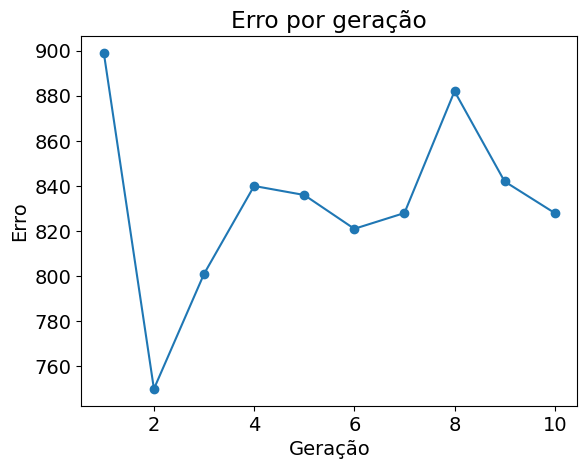

In [30]:
# Plota grafico de quantidade de erro pela geração

import matplotlib.pyplot as plt
import numpy as np

plt.rcParams.update({'font.size': 14})
plt.plot(range(1, len(p.errors)+1), p.errors, 'o-')
plt.xlabel('Geração')
plt.ylabel('Erro')
plt.title('Erro por geração')
plt.show()

In [31]:
# Testa com mais gerações
p2 = Perceptron(learning_rate=0.1, n_iters=100)
p2.fit(X_train, y_train)
predictions = p2.predict(X_test)
print('Accuracy: %.4f' % accuracy(y_test, predictions))



KeyboardInterrupt: 

In [29]:
# plota grafico de 1000 gerações pelo o erro

plt.plot(range(1, len(p2.errors)+1), p2.errors)

NameError: name 'p2' is not defined

In [32]:
from sklearn.preprocessing import StandardScaler
# Normaliza os dados e aplica o PCA
def normalizer(X):
    scaler = StandardScaler()
    X = scaler.fit_transform(X)
    return X


In [33]:
X_normalized = normalizer(X_bal)
X_train_norm, X_test_norm, y_train_norm, y_test_norm = train_test_split(X_normalized, y_bal, test_size=0.2)

In [34]:
p_norm = Perceptron(learning_rate=0.1, n_iters=50)
p_norm.fit(X_train_norm, y_train_norm)
predictions_norm = p_norm.predict(X_test_norm)
print('Accuracy: %.4f' % accuracy(y_test_norm, predictions_norm))

Accuracy: 1.0000


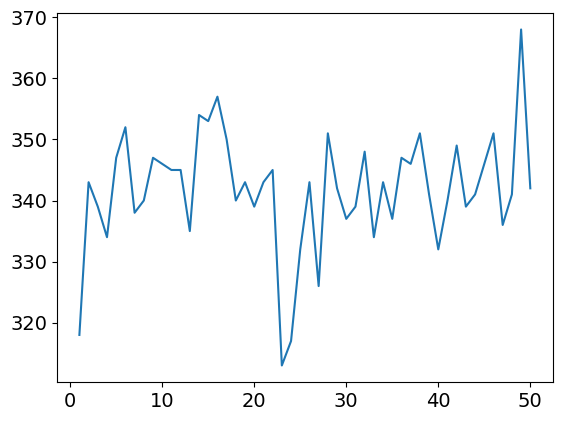

In [35]:
plt.plot(range(1, len(p_norm.errors)+1), p_norm.errors)